In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [11]:
df.drop("normalized-losses",axis=1,inplace=True)

In [12]:
df.drop("symboling",axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             205 non-null    object 
 1   fuel-type        205 non-null    object 
 2   body-style       205 non-null    object 
 3   drive-wheels     205 non-null    object 
 4   engine-location  205 non-null    object 
 5   width            205 non-null    float64
 6   height           205 non-null    float64
 7   engine-type      205 non-null    object 
 8   engine-size      205 non-null    int64  
 9   horsepower       205 non-null    object 
 10  city-mpg         205 non-null    int64  
 11  highway-mpg      205 non-null    int64  
 12  price            205 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 20.9+ KB


In [14]:
cat = df.select_dtypes(object)
num = df.select_dtypes(["int","float"])


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    cat[i] = le.fit_transform(cat[i])

In [20]:
df1 = pd.concat([cat,num],axis=1)
df1

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower,width,height,engine-size,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,5,64.1,48.8,130,21,27,13495
1,0,1,0,2,0,0,5,64.1,48.8,130,21,27,16500
2,0,1,2,2,0,5,20,65.5,52.4,152,19,26,16500
3,1,1,3,1,0,3,2,66.2,54.3,109,24,30,13950
4,1,1,3,0,0,3,8,66.4,54.3,136,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,7,68.9,55.5,141,23,28,16845
201,21,1,3,2,0,3,23,68.8,55.5,141,19,25,19045
202,21,1,3,2,0,5,13,68.9,55.5,173,18,23,21485
203,21,0,3,2,0,3,3,68.9,55.5,145,26,27,22470


In [21]:
y = df1["price"]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [23]:
x = df1.iloc[:,:-1]
x

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower,width,height,engine-size,city-mpg,highway-mpg
0,0,1,0,2,0,0,5,64.1,48.8,130,21,27
1,0,1,0,2,0,0,5,64.1,48.8,130,21,27
2,0,1,2,2,0,5,20,65.5,52.4,152,19,26
3,1,1,3,1,0,3,2,66.2,54.3,109,24,30
4,1,1,3,0,0,3,8,66.4,54.3,136,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,7,68.9,55.5,141,23,28
201,21,1,3,2,0,3,23,68.8,55.5,141,19,25
202,21,1,3,2,0,5,13,68.9,55.5,173,18,23
203,21,0,3,2,0,3,3,68.9,55.5,145,26,27


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
ypred

array([ 5724.14562484,  6653.45929538,  5200.60410042,  6795.10812284,
        8503.33706852, 26983.1338939 ,  7193.07453059,  2324.63835729,
        5200.60410042, 12828.33904396, 15962.51674469, 15212.02218219,
       17518.32631373, 10423.24690683, 16523.14683355, 14569.24319597,
        5944.43363678,  8375.9305499 , 11292.52010378,  9015.03438656,
       10492.69914441,  6339.05729023, 14589.98382208,  7406.25848175,
       14360.43974832,  8375.9305499 , 15121.94946031,  7184.73414384,
        4384.74358781,  8991.68062557,  7379.54936463, 13751.87073485,
       25547.5941233 , 10773.96671095, 18755.21875447,  7184.73414384,
        9112.3704596 , 30100.4841845 ,  9683.04566331, 17473.50696348,
        6357.29854432, 20079.3396412 ,  8912.68416864,  7422.37460217,
        8038.75614709,  6984.27108295, 40163.41441971,  7506.96402269,
       17484.20021774, 19634.42008863, 26706.37992745, 15148.2833212 ,
       22282.47472702,  5726.46346641, 12255.98652216,  7604.42473044,
      

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.8154269203427228

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

2347.0058006079175

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypred)

11122342.124039764

<AxesSubplot:xlabel='price'>

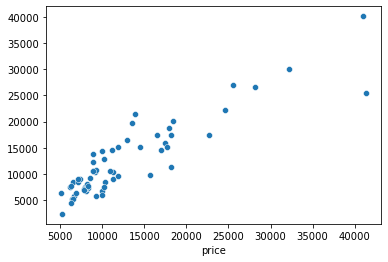

In [30]:
sns.scatterplot(ytest,ypred)